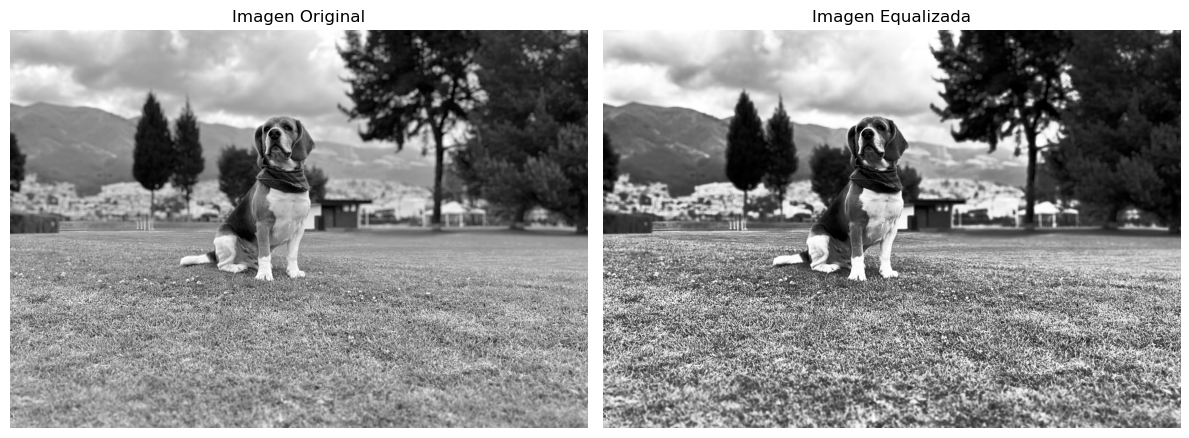

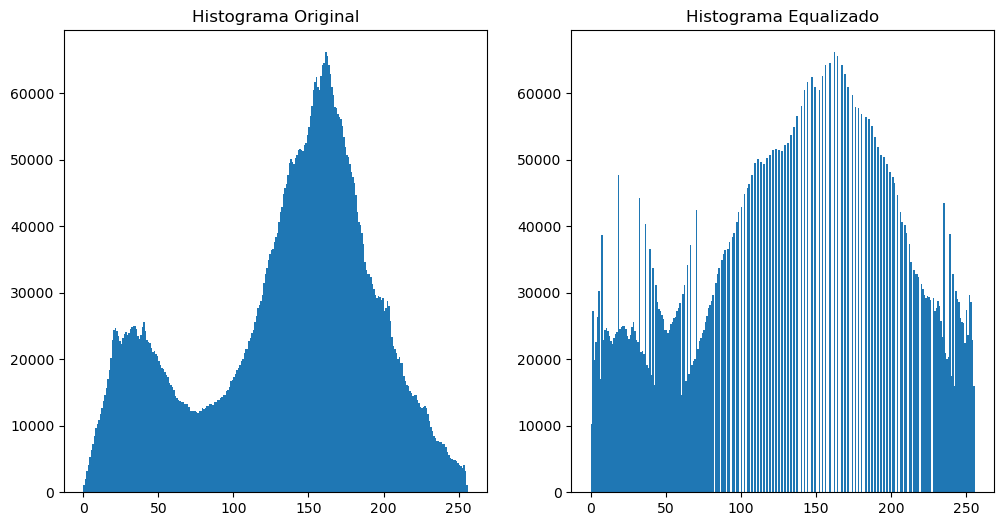

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises
img = cv2.imread('../histograma/IMG_6117.jpeg', cv2.IMREAD_GRAYSCALE)

# Equalizar histograma
img_equalizada = cv2.equalizeHist(img)

# Mostrar imágenes antes y después de la equalización
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_equalizada, cmap='gray')
plt.title('Imagen Equalizada')
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar histogramas antes y después de la equalización
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma Original')

plt.subplot(1, 2, 2)
plt.hist(img_equalizada.ravel(),256,[0,256])
plt.title('Histograma Equalizado')

plt.show()


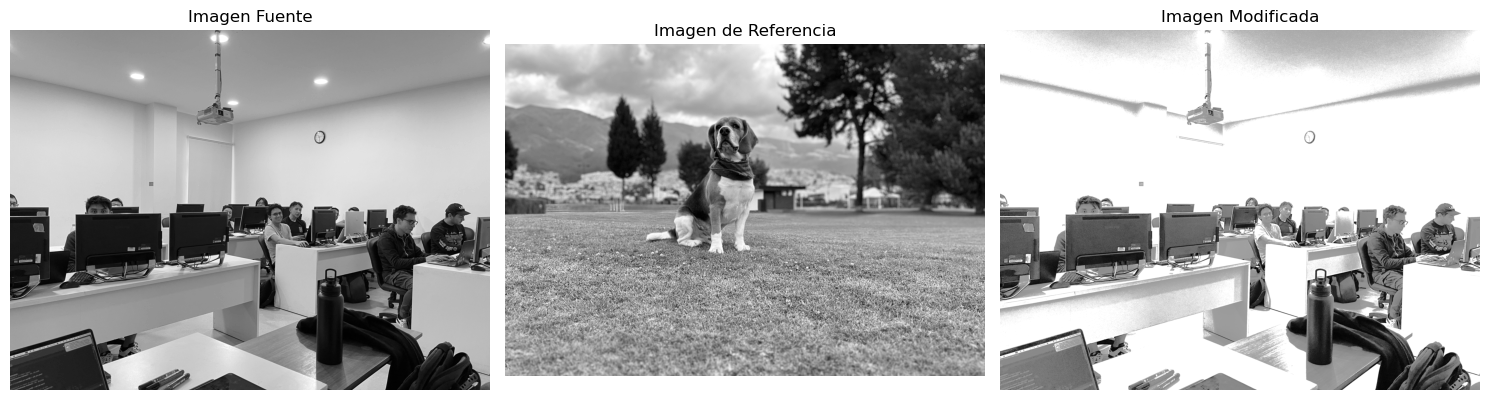

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_matching(source, reference):
    # Calcular histograma acumulativo de la imagen fuente
    hist_src, bins_src = np.histogram(source.flatten(), 256, [0,256])
    cdf_src = hist_src.cumsum()
    cdf_src_normalized = cdf_src * float(hist_src.max()) / cdf_src.max()

    # Calcular histograma acumulativo de la imagen de referencia
    hist_ref, bins_ref = np.histogram(reference.flatten(), 256, [0,256])
    cdf_ref = hist_ref.cumsum()
    cdf_ref_normalized = cdf_ref * float(hist_ref.max()) / cdf_ref.max()

    # Mapear valores de la imagen fuente basados en la relación de los CDFs
    cdf_match = np.interp(cdf_src_normalized, cdf_ref_normalized, np.arange(256))

    # Transformar valores de la imagen fuente usando el mapeo obtenido
    result = np.interp(source.flatten(), bins_src[:-1], cdf_match)
    return result.reshape(source.shape)

# Leer imágenes
source_img = cv2.imread('../histograma/IMG_0851.jpeg', cv2.IMREAD_GRAYSCALE)
reference_img = cv2.imread('../histograma/IMG_6117.jpeg', cv2.IMREAD_GRAYSCALE)

# Realizar el histogram matching
matched_img = histogram_matching(source_img, reference_img)

# Mostrar imágenes
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(source_img, cmap='gray')
plt.title('Imagen Fuente')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reference_img, cmap='gray')
plt.title('Imagen de Referencia')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('Imagen Modificada')
plt.axis('off')

plt.tight_layout()
plt.show()


# Trabajo en clase

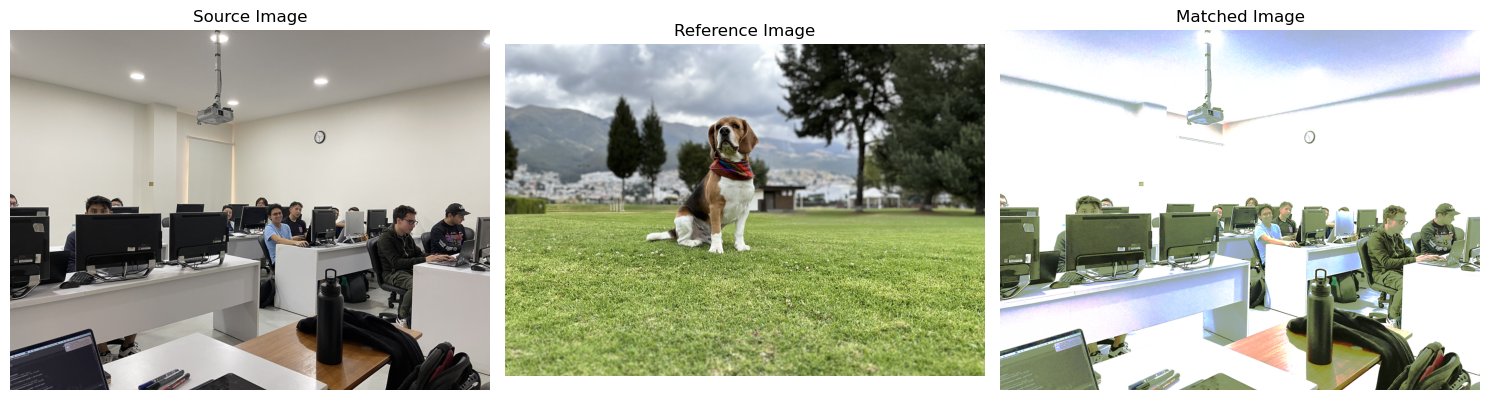

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_matching(source, reference):
    matched = np.zeros_like(source)
    for channel in range(source.shape[2]):
        src = source[:,:,channel]
        ref = reference[:,:,channel]
        hist_src, bins_src = np.histogram(src.flatten(), 256, [0,256])
        cdf_src = hist_src.cumsum()
        cdf_src_normalized = cdf_src * float(hist_src.max()) / cdf_src.max()

        hist_ref, bins_ref = np.histogram(ref.flatten(), 256, [0,256])
        cdf_ref = hist_ref.cumsum()
        cdf_ref_normalized = cdf_ref * float(hist_ref.max()) / cdf_ref.max()

        cdf_match = np.interp(cdf_src_normalized, cdf_ref_normalized, np.arange(256))

        result = np.interp(src.flatten(), bins_src[:-1], cdf_match)
        matched[:,:,channel] = result.reshape(src.shape)
    return matched

# Read images
source_img = cv2.cvtColor(cv2.imread('../histograma/IMG_0851.jpeg'), cv2.COLOR_BGR2RGB)
reference_img = cv2.cvtColor(cv2.imread('../histograma/IMG_6117.jpeg'), cv2.COLOR_BGR2RGB)

# Perform histogram matching
matched_img = histogram_matching(source_img, reference_img)

# Display images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(source_img)
plt.title('Source Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reference_img)
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_img.astype(np.uint8))
plt.title('Matched Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Referencias
Rosebrock, A. (2022, April 11). Histogram matching with OpenCV, scikit-image, and Python - PyImageSearch. PyImageSearch. https://pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/